# Constrained Online Meta Learning 
## A: Basic Online Learning

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

## The problem setting :
## $X_t$ : 1-D ~ N($\mu_t$,$\sigma$)
## $Y_t$ :

## \begin{equation*}
    y(x) = \begin{cases}
               0               & x \leq \mu_t \\
               1               & x > \mu_t\\
           \end{cases}
    \end{equation*}

## $\mu_t$ = 1-D random walk : $ |\mu_t-\mu_{t-1}| \leq \delta$

In [3]:
def random_walk():
    a = np.random.randint(0,2, size = (25))
    a = np.cumsum(2*a-1)
    return(a)

In [4]:
mean_a = random_walk()

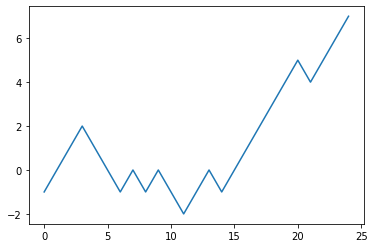

In [5]:
plt.plot(mean_a)

## Priviliged Classifier : Shifted Sigmoid
### $\hat y(x)\ = \frac{1}{1+e^{-(x+\theta)}}$ and Binary Cross-Entropy Loss : $\nabla_{\theta}\eta(\theta) = -\frac{1}{n}\nabla_{\theta}\Sigma_1^n (yln(y_{\theta})+(1-y)ln(1-y_{\theta})) = -\frac{1}{n}\Sigma_1^n y(1-y_{\theta})-(1-y)y_{\theta})$

## The labelling 

In [6]:
x = np.random.randn(10000)
a = x[x>0]
b = x[x<0]

(array([  1.,   1.,   0.,   1.,   3.,   2.,   5.,  13.,  10.,  24.,  28.,
         41.,  40.,  75.,  81.,  91., 104., 156., 166., 234., 266., 306.,
        294., 380., 379., 420., 439., 472., 481., 496.]),
 array([-3.75305295e+00, -3.62795515e+00, -3.50285735e+00, -3.37775955e+00,
        -3.25266176e+00, -3.12756396e+00, -3.00246616e+00, -2.87736836e+00,
        -2.75227057e+00, -2.62717277e+00, -2.50207497e+00, -2.37697717e+00,
        -2.25187938e+00, -2.12678158e+00, -2.00168378e+00, -1.87658598e+00,
        -1.75148819e+00, -1.62639039e+00, -1.50129259e+00, -1.37619479e+00,
        -1.25109700e+00, -1.12599920e+00, -1.00090140e+00, -8.75803605e-01,
        -7.50705807e-01, -6.25608010e-01, -5.00510212e-01, -3.75412415e-01,
        -2.50314617e-01, -1.25216820e-01, -1.19022452e-04]),
 <a list of 30 Patch objects>)

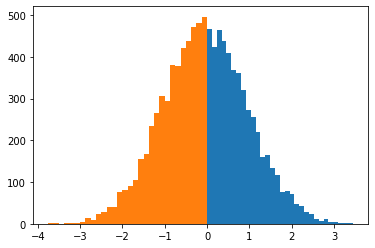

In [7]:
plt.hist(a,bins = 30)
plt.hist(b,bins = 30)

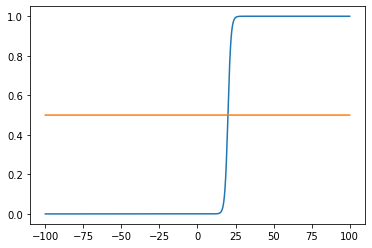

In [12]:
x = np.arange(-100,100,0.01)
y = 1/(1+np.exp(-x+20))
plt.plot(x,y)
plt.plot(x,0.5*np.ones(20000))

### If we make the slope a parameter, does the optimal slope depend on the variance?

#### I imagine not.

## For very high slope of the sigmoid, the expected derivative of 0-1 error w.r.t the threshold mean is equal to $\frac{d}{d\theta} |\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\theta} (e^{-\frac{-(t-\mu)^2}{2}})dt-1/2|= e^{-(\theta-\mu)^2/2}sign(\theta) $
## Our experiments are for finite slope of 1 and Binary Cross Entropy Loss function,  I think it will be useful to have the expected derivative update rule for this case as then it is a proper convex optimisation problem

### Example run of gradient descent for 10000 points from a single task

In [119]:
X=[]
mean = -1
x_curr = np.random.randn(10000)
x_curr = x_curr + mean
X.append(x_curr)
#     loss_curr = np.log(1+np.exp(-x_curr[ind_1]+ftl_param[i]))-np.log(np.exp(-x_curr[ind_0]+ftl_param[i])/(1+np.exp(-x_curr[ind_0]+ftl_param[i])))

loss_grad_btl = 0
theta_btl = btl_param[i]

loss = []
param = []

#gradient descent for btl 
for j in range(100):
    print('iteration:',j)
    print('loss_grad:',loss_grad_btl)
    print('param:',theta_btl)
    loss_grad_btl = 0
    for k,x in enumerate(X):
        print(k)
        ind_1 = x > -1
        ind_0 = x < -1
        # -sum(1-1/1+exp)[y=1]+sum(1+exp)[y=0]
        loss_grad_btl += (-np.sum((1-1/(1+np.exp(-(x[ind_1]+theta_btl)))))+np.sum(1/(1+np.exp(-(x[ind_0]+theta_btl)))))/10000
    theta_btl = theta_btl - step_size*(loss_grad_btl)
    loss_btl = (np.sum(np.log(1+np.exp(-(x_curr[ind_1]+theta_btl))))-np.sum(np.log(np.exp(-(x_curr[ind_0]+theta_btl))/(1+np.exp(-(x_curr[ind_0]+theta_btl))))))/10000

    loss.append(loss_btl)
    param.append(theta_btl)

iteration: 0
loss_grad: 0
param: 4.584016729020549
0
iteration: 1
loss_grad: 0.4590996915163553
param: 4.354466883262371
0
iteration: 2
loss_grad: 0.44961090904676465
param: 4.129661428738989
0
iteration: 3
loss_grad: 0.4384531209105635
param: 3.910434868283707
0
iteration: 4
loss_grad: 0.42553614633478326
param: 3.6976667951163154
0
iteration: 5
loss_grad: 0.41083496739685826
param: 3.4922493114178863
0
iteration: 6
loss_grad: 0.3944043494947739
param: 3.295047136670499
0
iteration: 7
loss_grad: 0.3763861586540644
param: 3.106854057343467
0
iteration: 8
loss_grad: 0.3570067818692636
param: 2.9283506664088352
0
iteration: 9
loss_grad: 0.3365639545222542
param: 2.760068689147708
0
iteration: 10
loss_grad: 0.3154046620203163
param: 2.6023663581375502
0
iteration: 11
loss_grad: 0.293897808873391
param: 2.455417453700855
0
iteration: 12
loss_grad: 0.2724063210608401
param: 2.3192142931704347
0
iteration: 13
loss_grad: 0.2512629947203884
param: 2.1935827958102405
0
iteration: 14
loss_grad: 

### Example Results (gradient descent on one task):
Loss is blue and goes to 0.5 (min BCE)
and weight is orange and goes to 1 (best weight) 

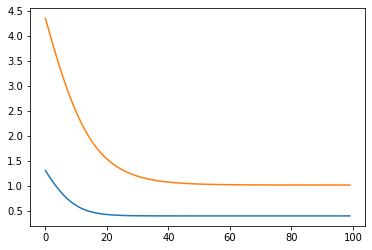

In [118]:
plt.plot(loss)
plt.plot(param)

In [174]:
ftl_param = [0]
btl_param = [0]
fctl_param = [0]

ftl_loss = [0]
ftcl_loss = [0]
btl_loss = [0]
X = []
comparator_param = 0
comparator_loss = 0
total_mean = 0

In this constraiend task setting, that is the random walk mean setting, we initialize the new parameter(for the i tasks) with the optimal parameter

In [1]:
step_size = 0.5
for (i,mean) in enumerate(mean_a):
    print('task:',i,'mean:',mean)
    x_curr = np.random.randn(10000)

    x_curr = x_curr + mean
    
    X.append(x_curr)
#     loss_curr = np.log(1+np.exp(-x_curr[ind_1]+ftl_param[i]))-np.log(np.exp(-x_curr[ind_0]+ftl_param[i])/(1+np.exp(-x_curr[ind_0]+ftl_param[i])))

    
    loss_grad_ftl = 0
    loss_grad_btl = 0

    theta_ftl = ftl_param[i]
    theta_btl = btl_param[i]
    
#     print('loss',loss_curr)
    #gradient descent for btl and ftl (without final task)
    for j in range(100):
        print('iteration:',j)
        print('loss_grad:',loss_grad_btl)
        print('param:',theta_btl)
        loss_grad_ftl = 0
        loss_grad_btl = 0
        for k,x in enumerate(X):
#             print(k)
            ind_1 = x > mean_a[k]
            ind_0 = x < mean_a[k]
            # -sum(1-1/1+exp)[y=1]+sum(1+exp)[y=0]
            loss_grad_btl += (-np.sum((1-1/(1+np.exp(-(x[ind_1]+theta_btl)))))+np.sum(1/(1+np.exp(-(x[ind_0]+theta_btl)))))/10000
            loss_grad_ftl += (-np.sum((1-1/(1+np.exp(-(x[ind_1]+theta_ftl)))))+np.sum(1/(1+np.exp(-(x[ind_0]+theta_ftl)))))/10000
#             print(np.sum(np.log(1+np.exp(-x_curr[ind_1]+ftl_param[i])))-np.sum(np.log(np.exp(-x_curr[ind_0]+ftl_param[i])/(1+np.exp(-x_curr[ind_0]+ftl_param[i])))))
        
        loss_grad_ftl-= (-np.sum((1-1/(1+np.exp(-(x[ind_1]+theta_ftl)))))+np.sum(1/(1+np.exp(-(x[ind_0]+theta_ftl)))))/10000
        
        theta_ftl = theta_ftl - step_size*(loss_grad_ftl)
        theta_btl = theta_btl - step_size*(loss_grad_btl)
    
    theta_curr = theta_btl
    for j in range(100):
        x = X[-2]
        loss_grad_curr += (-np.sum((1-1/(1+np.exp(-(x[ind_1]+theta_curr)))))+np.sum(1/(1+np.exp(-(x[ind_0]+theta_curr)))))/10000
        theta_curr = theta_curr - step_size*(loss_grad_curr)
        
    if (theta_curr-theta_ftl)/np.sign(theta_curr-theta_ftl) > 1:
        temp = [theta_curr-1,theta_curr+1]
        a = 0
        b = 0
        for i in range(len(X)-1):
            x_curr = X[i]
            a += (np.sum(np.log(1+np.exp(-(x_curr[ind_1]+temp[0]))))-np.sum(np.log(np.exp(-(x_curr[ind_0]+temp[0]))/(1+np.exp(-(x_curr[ind_0]+temp[0]))))))/10000
        
        for i in range(len(X)-1):
            x_curr = X[i]
            b = (np.sum(np.log(1+np.exp(-(x_curr[ind_1]+temp[1]))))-np.sum(np.log(np.exp(-(x_curr[ind_0]+temp[1]))/(1+np.exp(-(x_curr[ind_0]+temp[1]))))))/10000

        if b>a:
            theta_ftl = temp[0]
        else:
            theta_ftl = temp[1]
    
    ftl_param.append(theta_ftl)
    btl_param.append(theta_btl)        
    ftcl_param.append()
    ind_1 = x_curr > mean
    ind_0 = x_curr < mean 
  
    ftl_curr_loss = (np.sum(np.log(1+np.exp(-(x_curr[ind_1]+ftl_param[i+1]))))-np.sum(np.log(np.exp(-(x_curr[ind_0]+ftl_param[i+1]))/(1+np.exp(-(x_curr[ind_0]+ftl_param[i+1]))))))/10000
    btl_curr_loss = (np.sum(np.log(1+np.exp(-(x_curr[ind_1]+btl_param[i+1]))))-np.sum(np.log(np.exp(-(x_curr[ind_0]+btl_param[i+1]))/(1+np.exp(-(x_curr[ind_0]+btl_param[i+1]))))))/10000


    
    ftl_loss.append(ftl_curr_loss)
    btl_loss.append(btl_curr_loss)
    ftcl_loss.append()

comparator_param = btl_param[-1]
loss_comp = []
for k,x in enumerate(X):
    ind_1 = x > mean_a[k]
    ind_0 = x < mean_a[k]    
    loss_comp.append((np.sum(np.log(1+np.exp(-(x[ind_1]+comparator_param))))-np.sum(np.log(np.exp(-(x[ind_0]+comparator_param))/(1+np.exp(-(x[ind_0]+comparator_param))))))/10000)
plt.plot(np.cumsum(ftl_loss)[1:])
plt.plot(np.cumsum(btl_loss)[1:])
plt.plot(np.cumsum(np.array(loss_comp)))

NameError: name 'mean_a' is not defined

## The ftl, btl and comparator losses

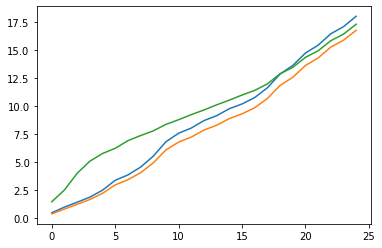

In [176]:
plt.plot(np.cumsum(ftl_loss)[1:])
plt.plot(np.cumsum(btl_loss)[1:])
plt.plot(np.cumsum(np.array(loss_comp)))

## Ftl and Btl regret. (0 for comparator)

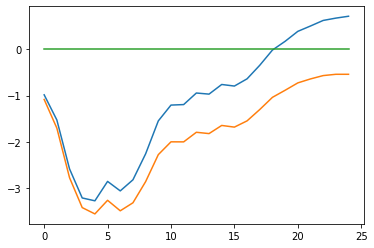

In [179]:
plt.plot(np.cumsum(ftl_loss)[1:]-np.cumsum(np.array(loss_comp)))
plt.plot(np.cumsum(btl_loss)[1:]-np.cumsum(np.array(loss_comp)))
plt.plot(np.zeros(25))

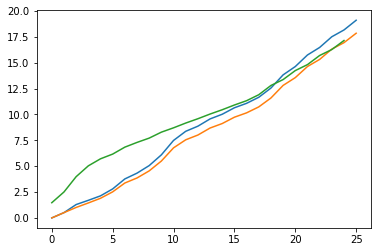

In [166]:
plt.plot(np.cumsum(ftl_loss))
plt.plot(np.cumsum(btl_loss))
plt.plot(np.cumsum(np.array(loss_comp)))

## The ftl, btl and comparator parameters and the (negatoive of )mean

Text(0.5, 1.0, 'Parameters and negative Mean')

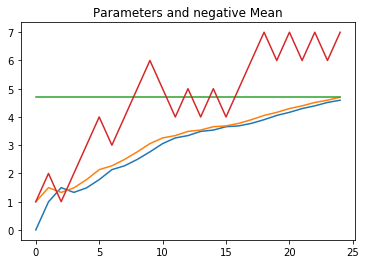

In [187]:
plt.plot(np.array(ftl_param[1:]))
plt.plot(np.array(btl_param[1:]))
plt.plot(comparator_param*np.ones(25))
plt.plot(-mean_a)
plt.title('Parameters and negative Mean')

In [6]:
Gaussian Complexity of a single sigmoid activated neuron?
distance from all previous points?
adverserial within distance from all previous points??
Stocks?

Object `sigmoid` not found.
Object `points` not found.
Object `points` not found.
Object `Stocks` not found.


## We want to solve:

$w* = argmin_w \Sigma_{r=1}^T f_r(w_r) $ 
### $w = \{w_1,w_2,..w_r\}.$ 


The solution to the below Langrangian(s) need not be same as w*.

## Approach 1

# Proposed constrained adverserial solution:

### $L_t = \Sigma_{r=1}^{t-1} f_r(w_t) + \Sigma_{r=1}^T (\lambda (|w_{t-r+1}-w_{t-r}| -r\delta)) $


### $w^* = argmin (L_t(w))$

### We can easily the following problem :

Optimizing the FTL loss(T-1) Constraining the weight to be within the limit .....................(1)

Just taking the final condition. SInce only the last constraint is relevant

### Langrangian is hence:

### $L_t = \Sigma_{r=1}^{t-1} f_r(w_t) +\lambda (|w_t-w_{t-1}| -\delta) $

### We will implement the following simple algorithms (Follow the constrained leader) :

    1)FTCL 1 : 
    
       a)Find the solution of ftl if it lies in the delta ball
       
       b)Else search on the ball.     
       
    2)FTCL 2 : 
      Projected Gradient Descent.
  

![PGD.jpeg](./PGD.jpeg)

Project on each ball surface (varying radius)?
Does the langrangian really solve the constrained weight problem?